In [153]:
import pandas as pd

df=pd.read_csv("data.txt")

df = pd.get_dummies(df, columns=['team'], dtype = int)

df['department'] = df['department'].replace('finishing ', 'finishing')

df.head()

,date,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1/1/2015,Quarter1,sweing,Thursday,0.80,26.16,1108.0,7080,98,0.0,...,0,0,0,0,0,1,0,0,0,0
1,1/1/2015,Quarter1,finishing,Thursday,0.75,3.94,NaN,960,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1/1/2015,Quarter1,sweing,Thursday,0.80,11.41,968.0,3660,50,0.0,...,0,0,0,0,0,0,0,0,1,0
3,1/1/2015,Quarter1,sweing,Thursday,0.80,11.41,968.0,3660,50,0.0,...,0,0,0,0,0,0,0,0,0,1
4,1/1/2015,Quarter1,sweing,Thursday,0.80,25.90,1170.0,1920,50,0.0,...,0,0,0,1,0,0,0,0,0,0


In [156]:
df_sinWIP=df.drop('wip', axis=1)

df_sinWIP = pd.get_dummies(df_sinWIP, columns=['department'], dtype = int)

df_sinWIP.columns

Index(['date', 'quarter', 'day', 'targeted_productivity', 'smv', 'over_time',
       'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity', 'team_1', 'team_2', 'team_3',
       'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9', 'team_10',
       'team_11', 'team_12', 'department_finishing', 'department_sweing'],
      dtype='object')

In [139]:
# df_sinFinishing = df.drop(df[df['department'] == 'finishing'].index)

# valores_unicos = df_sinFinishing['department'].unique()
# print(valores_unicos)



['sweing']


Index(['date', 'quarter', 'department', 'day', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity', 'team_1', 'team_2', 'team_3',
       'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9', 'team_10',
       'team_11', 'team_12'],
      dtype='object')

In [147]:
df_sinWIP.shape

(1197, 26)

Modelo de Regresion Sin WIP

In [163]:
features = ['targeted_productivity', 'smv', 'over_time',
       'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'team_1', 'team_2', 'team_3',
       'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9', 'team_10',
       'team_11', 'team_12', 'department_finishing', 'department_sweing']

X = df_sinWIP[features]

X.head()

,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,team_1,team_2,...,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,department_finishing,department_sweing
0,0.80,26.16,7080,98,0.0,0,0,59.0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.75,3.94,960,0,0.0,0,0,8.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.80,11.41,3660,50,0.0,0,0,30.5,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.80,11.41,3660,50,0.0,0,0,30.5,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0.80,25.90,1920,50,0.0,0,0,56.0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [164]:
Y = df_sinWIP['actual_productivity']

Y.head()

0    0.940725
1    0.886500
2    0.800570
3    0.800570
4    0.800382
Name: actual_productivity, dtype: float64

In [165]:
print(type(X))
print(type(Y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Division Entre Entrenamiento y Prueba

In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, test_size=0.3)

In [167]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(837, 22)
(837,)
(360, 22)
(360,)


In [168]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, Y_train)

# print('Intercepto: ' + str(linreg.intercept_))

# print('Coeficientes: ' + str(linreg.coef_))

list(zip(features, linreg.coef_))

[('targeted_productivity', 0.7205759212644837),
 ('smv', -0.007476902098506965),
 ('over_time', -4.939275288373198e-06),
 ('incentive', 7.239372343924992e-05),
 ('idle_time', 8.18430777265063e-05),
 ('idle_men', -0.008987824655430646),
 ('no_of_style_change', -0.03709573165485786),
 ('no_of_workers', 0.004706351063230924),
 ('team_1', 0.06267209644136927),
 ('team_2', 0.022726902880488703),
 ('team_3', 0.0629142952383202),
 ('team_4', 0.047742411886613434),
 ('team_5', 0.004772506884428665),
 ('team_6', -0.0543761335076882),
 ('team_7', -0.014973235443674177),
 ('team_8', -0.042940958205447785),
 ('team_9', -0.022167919267018454),
 ('team_10', -0.013726291804144359),
 ('team_11', -0.062126443093748984),
 ('team_12', 0.009482767990503143),
 ('department_finishing', 0.015902338501236523),
 ('department_sweing', -0.01590233850123629)]

# Predicciones Usando los Datos de Prueba

In [169]:
Y_pred = linreg.predict(X_test)

Evaluar el Modelo

In [171]:
from sklearn import metrics

import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(Y_test, Y_pred)

# mean squared error
MSE = metrics.mean_squared_error(Y_test, Y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  0.11146304275670119
MSE:  0.025604044486219005
RMSE:  0.16001263852027128


# Validacion Cruzada?? Clase 5


Stats Models

In [172]:
import statsmodels.api as sm

features = ['targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'team_1', 'team_2', 'team_3',
       'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9', 'team_10',
       'team_11', 'team_12']

X = df_sinWIP[features]

Y = df_sinWIP['actual_productivity']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

# # agregar constante explíticamente
X_train = sm.add_constant(X_train)

# # regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(Y_train, X_train).fit()

# # resumen de resultados
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.343
Model:                             OLS   Adj. R-squared:                  0.329
Method:                  Least Squares   F-statistic:                     24.12
Date:                 Sun, 10 Mar 2024   Prob (F-statistic):           2.77e-67
Time:                         02:23:59   Log-Likelihood:                 493.29
No. Observations:                  897   AIC:                            -946.6
Df Residuals:                      877   BIC:                            -850.6
Df Model:                           19                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

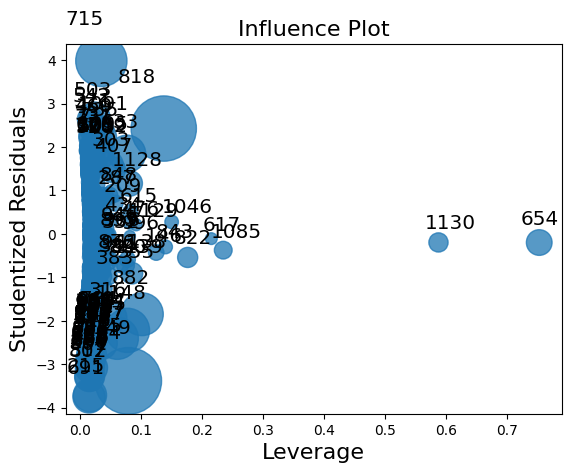

In [173]:
fig = sm.graphics.influence_plot(model, criterion="cooks")